**Importing Libraries and Data**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [4]:
with open("./traffic-signs-data/train.p",mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/test.p",mode='rb') as test_data:
    test = pickle.load(test_data)
with open("./traffic-signs-data/valid.p",mode='rb') as validation_data:
    valid = pickle.load(validation_data)

In [5]:
X_train, y_train = train['features'],train['labels']
X_validation, y_validation = valid['features'],valid['labels']
X_test, y_test = test['features'],test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

**Images Exploration**

In [11]:
#to check if the images and labels match our given classes

36

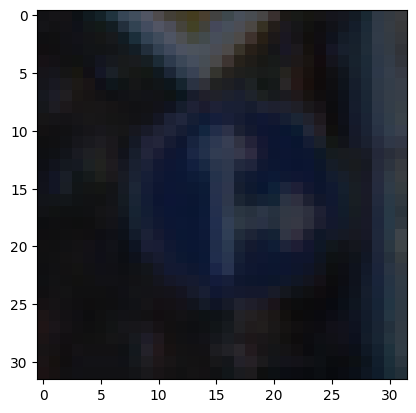

In [12]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

26

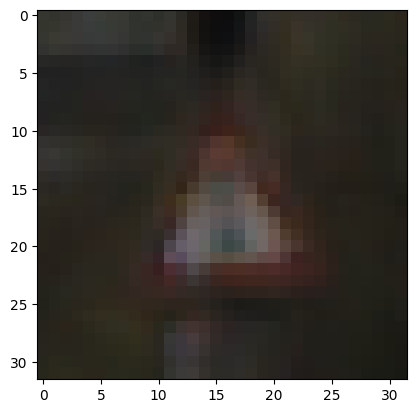

In [13]:
i = 1500
plt.imshow(X_train[i])
y_train[i]

23

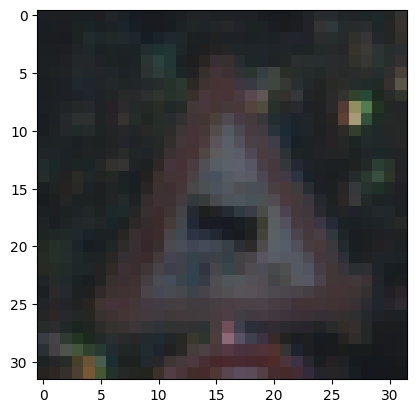

In [14]:
i = 2000
plt.imshow(X_train[i])
y_train[i]

1

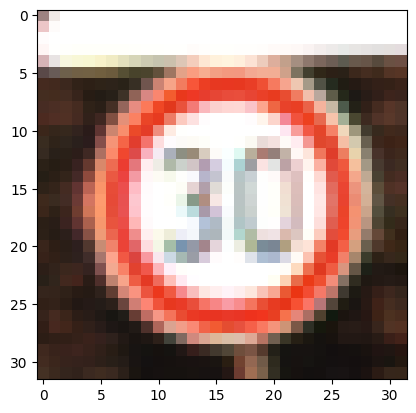

In [15]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

37

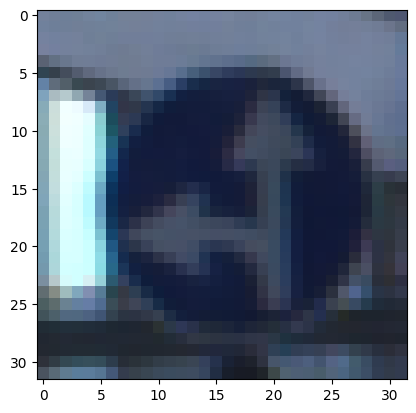

In [16]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

4

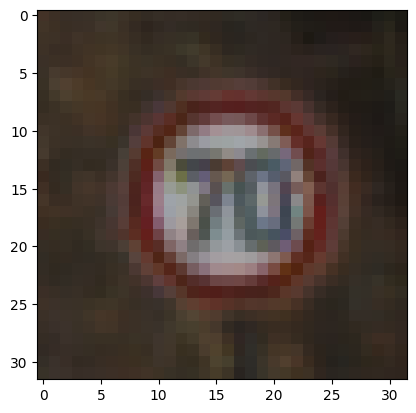

In [17]:
i = 1000
plt.imshow(X_validation[i])
y_validation[i]

17

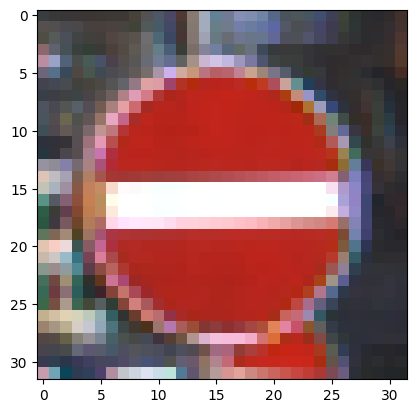

In [18]:
i = 1000
plt.imshow(X_test[i])
y_test[i]